<a href="https://colab.research.google.com/github/anissssssssssssss/TDM/blob/main/preprocessing_df2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/TDM_project/customer_purchase_data.csv')

In [ ]:
#print the first 5 rows of the dataset
df2.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [ ]:
#print the info of each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [ ]:
# Print Qualitative Data
qualitative_attributes = df2.select_dtypes(include=['object', 'category']).columns.tolist()
print("Qualitative (categorical) attributes:", qualitative_attributes)

Qualitative (categorical) attributes: []


In [ ]:
# Identify quantitative (numerical) attributes
quantitative_attributes = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Quantitative (numerical) attributes:", quantitative_attributes)

Quantitative (numerical) attributes: ['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory', 'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed', 'PurchaseStatus']


In [ ]:
#check for columns with missing values
df2.isnull().sum()

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


In [ ]:
# check if there are duplicates row
duplicate_rows_df = df2[df2.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
# Print the duplicate rows.
duplicate_rows_df

number of duplicate rows:  (112, 9)


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
243,57,1,79069.053493,8,4,43.221622,0,2,0
271,43,0,101042.774561,14,4,1.596751,0,5,0
299,65,1,55499.205296,20,4,12.778100,0,5,0
304,50,0,41425.926045,6,0,29.865093,1,2,0
306,56,1,48679.553852,17,1,10.110530,0,3,0
...,...,...,...,...,...,...,...,...,...
1461,67,1,110466.885362,17,0,43.108669,0,1,0
1484,68,0,80311.223269,14,2,19.080098,0,3,0
1485,21,1,120794.999552,10,0,7.630770,0,2,0
1492,63,0,71874.591294,10,2,43.546243,0,1,0


- there are 112 duplicate rows

In [ ]:
df2.drop_duplicates(inplace=True)
duplicate_rows_df = df2[df2.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [ ]:
df2.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,43.939481,0.501441,84699.045444,10.548991,2.002882,30.747545,0.333573,2.609510,0.466859
std,15.487533,0.500178,37541.136478,5.869383,1.422851,16.976852,0.471659,1.699984,0.499080
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.000000
25%,30.750000,0.000000,53766.895806,6.000000,1.000000,16.379635,0.000000,1.000000,0.000000
50%,44.000000,1.000000,84625.292873,11.000000,2.000000,31.213146,0.000000,3.000000,0.000000
75%,57.000000,1.000000,117188.207975,15.000000,3.000000,44.666368,1.000000,4.000000,1.000000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.000000


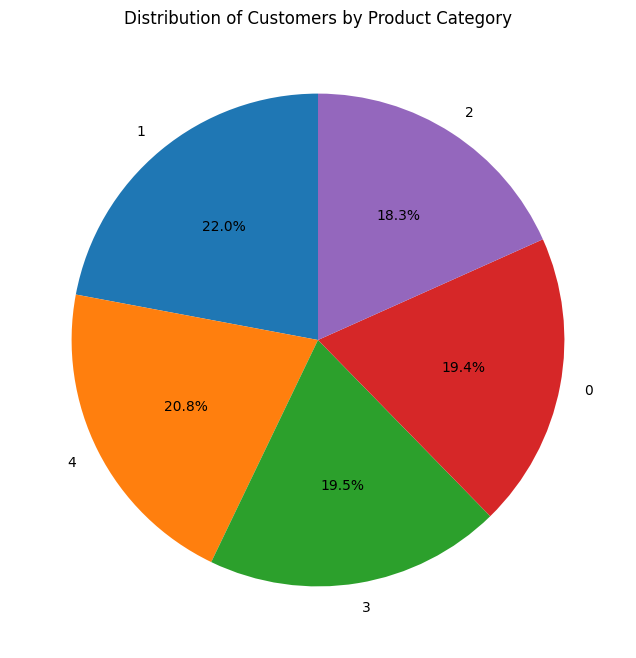

In [ ]:
# count the occurrences of each region
ProductCategory_counts = df2['ProductCategory'].value_counts()

# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ProductCategory_counts, labels=ProductCategory_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customers by Product Category')

# show the plot
plt.show()

<br>- Product category 1 has the highest customer interest of buying with 22.0%
<br>- The lowest product category purchased by customer is 2 with 18.3%